In [1]:
!pip install dabl -Uqqq 


In [2]:

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import warnings
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

import numpy as np
from sklearn.model_selection import train_test_split

# Ignore all warnings (not recommended)
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")



In [3]:
df = pd.read_csv('RTA Dataset.csv')
column = df.columns
# all the categorical columns
cat_columns = [colname for colname in df.select_dtypes(["object", "category"])]
len(cat_columns)



30

In [4]:
df.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
import dabl
dabl.detect_types(df)

,continuous,dirty_float,low_card_int_ordinal,low_card_int_categorical,categorical,date,free_string,useless
Time,False,False,False,False,False,True,False,False
Day_of_week,False,False,False,False,True,False,False,False
Age_band_of_driver,False,False,False,False,True,False,False,False
Sex_of_driver,False,False,False,False,True,False,False,False
Educational_level,False,False,False,False,True,False,False,False
Vehicle_driver_relation,False,False,False,False,True,False,False,False
Driving_experience,False,False,False,False,True,False,False,False
Type_of_vehicle,False,False,False,False,True,False,False,False
Owner_of_vehicle,False,False,False,False,True,False,False,False
Service_year_of_vehicle,False,False,False,False,True,False,False,False


In [7]:
import random

def random_palette():
    """
    Create a random palette each every time
    """
    # Creating a mix of multiple palettes
    base_palette = sns.color_palette("pastel", 5) + sns.color_palette("tab20c", 5) + sns.color_palette("tab20b", 5)
    # Sample specific colors from the base palette
    colour_list = random.sample(base_palette, 5)
    # Blend the palettes to create a new palette
    palette = sns.blend_palette([colour for colour in colour_list], 10)
    return palette

In [8]:
def subplot(df, i, column, order=None, pallete=random_palette()):
    plt.subplot(2, 3 ,i)
    sns.barplot(data=df[column].value_counts().reset_index(), x = column, y = 'count', palette=random_palette(), order=order)
    plt.xticks(rotation=45)


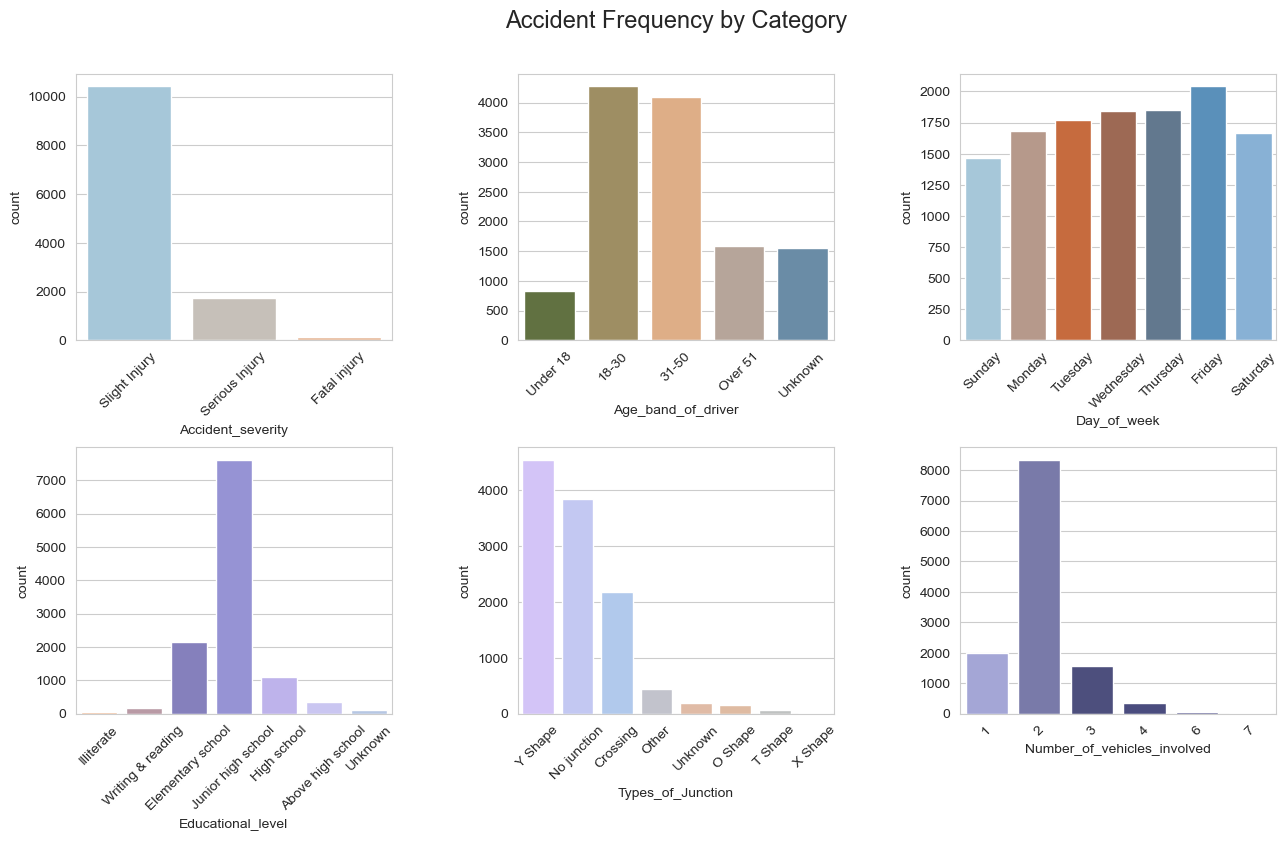

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
plt.suptitle("Accident Frequency by Category", fontsize=17)

subplot(df, i=1, column = 'Accident_severity')

age_order = ['Under 18', '18-30', '31-50', 'Over 51', 'Unknown']
subplot(df, i=2, column = 'Age_band_of_driver', order= age_order)

day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
subplot(df, i=3, column = 'Day_of_week', order=day_order)

education_order= ["Illiterate", "Writing & reading", "Elementary school", "Junior high school","High school","Above high school","Unknown"]
subplot(df, i=4, column = 'Educational_level', order=education_order)

subplot(df, i=5, column = 'Types_of_Junction')
subplot(df, i=6, column = 'Number_of_vehicles_involved')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [10]:


def fatality_df(column, df=df, sort=False):

# finding out the relationship between Accident severity and a column
    df_hello = df.groupby(['Accident_severity', column]).Time.count().reset_index()

    # creating a list of all categories to plot
    rowlist = [row for row in df_hello[column]]
    sumlist = []
    for row in rowlist:
        sumlist.append(df_hello.loc[df_hello[column] == row].Time.sum())

    df_hello['sum'] = sumlist
    df_hello['ratio'] = df_hello['Time']/df_hello['sum']
    df_final = df_hello.loc[df_hello.Accident_severity=='Fatal injury']
    if sort==True:
        df_final = df_final.sort_values(by='ratio')
    return df_final

# example
fatal_collisiontype_df = fatality_df('Type_of_collision', sort=True)
fatal_collisiontype_df



,Accident_severity,Type_of_collision,Time,sum,ratio
3,Fatal injury,Rollover,4,397,0.010076
0,Fatal injury,Collision with animals,2,171,0.011696
4,Fatal injury,Vehicle with vehicle collision,104,8774,0.011853
2,Fatal injury,Collision with roadside objects,24,1786,0.013438
1,Fatal injury,Collision with pedestrians,22,896,0.024554


In [11]:
def fatal_palette(df, positions_to_change: list):
    """
    A function to create grey red palettes according to the inputs
    You just need to pass in the dataframe and the index of labels to be highlighted in red
    """
    palette = ['#96898b']*df.shape[0]
    new_values = ['#cc253b']*len(positions_to_change)
    for position, new_value in zip(positions_to_change, new_values):
        palette[position] = new_value
    return sns.color_palette(palette)
    
# example
fatal_palette(fatality_df('Types_of_Junction'), [0, 1])

[(0.8, 0.1450980392156863, 0.23137254901960785),
 (0.8, 0.1450980392156863, 0.23137254901960785),
 (0.5882352941176471, 0.5372549019607843, 0.5450980392156862),
 (0.5882352941176471, 0.5372549019607843, 0.5450980392156862),
 (0.5882352941176471, 0.5372549019607843, 0.5450980392156862),
 (0.5882352941176471, 0.5372549019607843, 0.5450980392156862)]

In [12]:
def fatal_plot(i, column, red_list, order=None, custom_labels=None, subplot=True, sort=False):
    """
    Plot charts using the fatality_df and fatal_palette. 
    Used to plot values in a column against the fatality frequency.  
    """
    if subplot==True:
        plt.subplot(2, 3 ,i)
    sns.barplot(data=fatality_df(column, sort=sort), x=column, y='ratio', palette=fatal_palette(fatality_df(column, sort=sort), red_list), order=order)
    
    # pass in custom x labels
    if custom_labels is not None:
        # Get the current x-axis tick positions
        xtick_positions = plt.xticks()[0]
        # Set the custom labels at the desired positions
        plt.xticks(xtick_positions, custom_labels)
        
    plt.xticks(rotation=45)
    plt.xlabel(column, fontsize= 14).set_color('#425169')
    plt.ylabel('Fatality ratio', fontsize= 14).set_color('#425169')
    ax = plt.gca()
    ax.spines[['bottom', 'left', 'top', 'right']].set_color('#425169')
    ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(1)

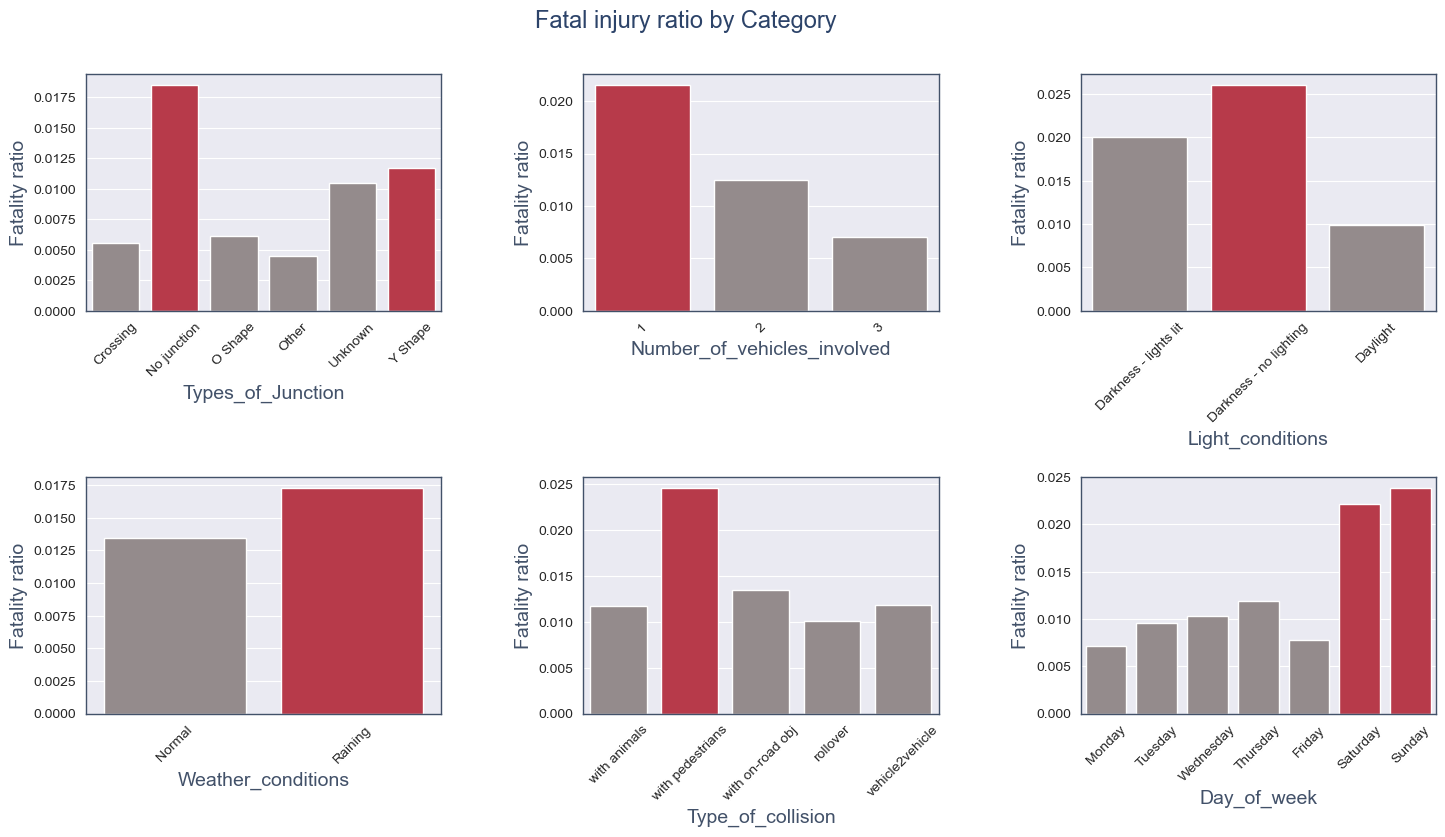

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
plt.suptitle("Fatal injury ratio by Category", fontsize=17).set_color('#2c4369')

fatal_plot(1, 'Types_of_Junction', [1, 5])
fatal_plot(2, 'Number_of_vehicles_involved', [0])
fatal_plot(3, 'Light_conditions', [1])
fatal_plot(4, 'Weather_conditions', [1])
fatal_plot(5, 'Type_of_collision', [1], custom_labels = ['with animals', 'with pedestrians', 'with on-road obj', 'rollover', 'vehicle2vehicle'])
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
fatal_plot(6, 'Day_of_week', [-1, -2], order=day_order)


# sns.despine( right=True, left=False, top=True, bottom=False)
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()

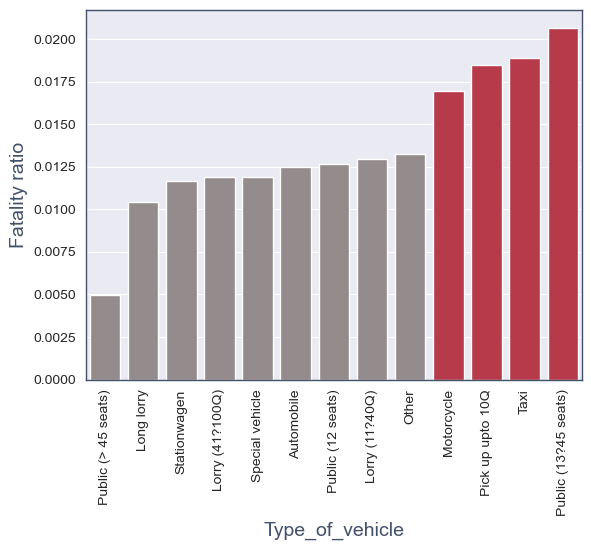

In [14]:
fatal_plot(1, 'Type_of_vehicle', [-1, -2, -3, -4], subplot=False, sort=True)
plt.xticks(rotation=90)
plt.show()

In [15]:
def crossdf(col):
    """
    Return a pandas crosstab for the given column against the target variable
    """
    crossdf = pd.crosstab(df['Accident_severity'], df[col], normalize='index')
    crossdf = crossdf.reset_index()
    return crossdf

#example
df1 = crossdf('Sex_of_driver')
df1

Sex_of_driver,Accident_severity,Female,Male,Unknown
0,Fatal injury,0.031646,0.962025,0.006329
1,Serious Injury,0.059667,0.930006,0.010327
2,Slight Injury,0.056841,0.927892,0.015266


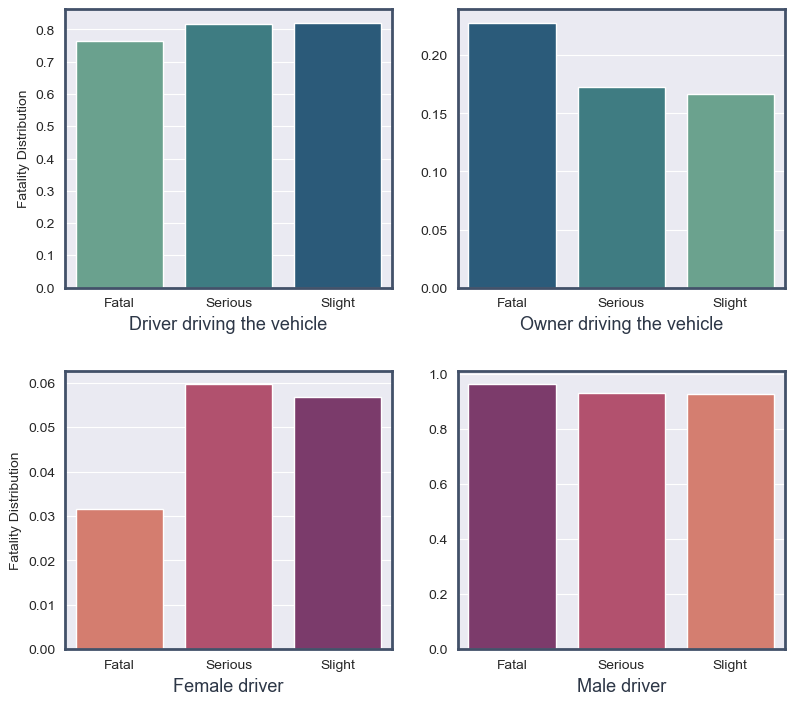

In [16]:
plt.figure(figsize=(8, 8))
custom_labels = ['Fatal', 'Serious', 'Slight']

plt.subplot(2, 2, 1)
sns.barplot(data = crossdf('Vehicle_driver_relation'),  x = 'Accident_severity', y = 'Employee', palette = 'crest')
plt.xlabel('Driver driving the vehicle', fontsize= 13).set_color('#2d3747')
plt.ylabel('Fatality Distribution')
###
xtick_positions = plt.xticks()[0]
plt.xticks(xtick_positions, custom_labels)
ax = plt.gca()
ax.spines[['bottom', 'left', 'top', 'right']].set_color('#425169')
ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)   


plt.subplot(2, 2, 2)
sns.barplot(data = crossdf('Vehicle_driver_relation'),  x = 'Accident_severity', y = 'Owner', palette = 'crest_r')
plt.xlabel('Owner driving the vehicle', fontsize= 13).set_color('#2d3747')
plt.ylabel('')
###
xtick_positions = plt.xticks()[0]
plt.xticks(xtick_positions, custom_labels)
ax = plt.gca()
ax.spines[['bottom', 'left', 'top', 'right']].set_color('#425169')
ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)


plt.subplot(2, 2, 3)
sns.barplot(data = crossdf('Sex_of_driver'),  x = 'Accident_severity', y = 'Female', palette = 'flare')
plt.xlabel('Female driver', fontsize= 13).set_color('#2d3747')
plt.ylabel('Fatality Distribution')
###
xtick_positions = plt.xticks()[0]
plt.xticks(xtick_positions, custom_labels)
ax = plt.gca()
ax.spines[['bottom', 'left', 'top', 'right']].set_color('#425169')
ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)

plt.subplot(2, 2, 4)
sns.barplot(data = crossdf('Sex_of_driver'),  x = 'Accident_severity', y = 'Male', palette = 'flare_r')
plt.xlabel('Male driver', fontsize= 13).set_color('#2d3747')
plt.ylabel('')
###
xtick_positions = plt.xticks()[0]
plt.xticks(xtick_positions, custom_labels)
ax = plt.gca()
ax.spines[['bottom', 'left', 'top', 'right']].set_color('#425169')
ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(2)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)

In [17]:
## Removing columns containing missing values
# If a column contains a lot of missing values, say more than 80%, and the feature is not significant
# Lets see if we can drop the useless columns identified by dabl: Fitness_of_casuality, Defect_of_vehicle
# also removing [Service_year_of_vehicle: doesnt seem related to severity(found using crosstab)]
columns_to_drop = ['Fitness_of_casuality', 'Service_year_of_vehicle', 'Defect_of_vehicle']
df_dropped = df.drop(columns=columns_to_drop)

# Work_of_casuality was not dropped though it had a lack of data.
df_dropped.replace('unknown', 'Unknown', inplace=True)
df_dropped.Work_of_casuality = df_dropped.Work_of_casuality.fillna('Unknown') # na values sent to 'Unknown' category
# same was done for all the columns containing 'Unknown' as a value in the row
columns_with_unknown = df_dropped.columns[df_dropped.isin(['Unknown']).any()]
for column in columns_with_unknown:
    df_dropped[column] = df_dropped[column].fillna('Unknown')

# fill missing values
for column in df_dropped.columns:
    mode_value = df_dropped[column].mode()[0]
    df_dropped[column].fillna(mode_value, inplace=True)

In [18]:


df_dropped['Time'] = pd.to_datetime(df_dropped['Time'])
# Extract the time portion and store it as a new column
df_dropped['Time'] = df_dropped['Time'].dt.strftime('%H:%M:%S')

# convert time in '%H:%M:%S' format to just hours
df_dropped['Time'] = df_dropped['Time'].str.split(':').str[0].astype(int)
# Define time ranges for the categories
bins = [0, 6, 12, 18, 24]  # Morning, Afternoon, Evening, Night
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
# Create a new categorical column based on the time ranges
df_dropped['Time'] = pd.cut(df_dropped['Time'], bins=bins, labels=labels, right=False)



In [19]:
all_columns = df_dropped.columns.tolist()
ordinal_columns = ['Time', 'Day_of_week', 'Age_band_of_driver', 'Educational_level', 'Driving_experience', 'Light_conditions', 'Age_band_of_casualty', 'Casualty_severity']
label_columns = [col for col in all_columns if col not in ordinal_columns]
columns_to_remove = ['Number_of_casualties', 'Number_of_vehicles_involved']
label_columns = [col for col in label_columns if col not in columns_to_remove]

In [20]:
from sklearn.preprocessing import LabelEncoder

def encode_columns(df, label_encode_columns=None, ordinal_encode_columns=None):
    """
    Encode specified columns in a DataFrame using label encoding and ordinal encoding.
    Returns:
        pd.DataFrame: A copy of the DataFrame with specified columns encoded.
    """
    encoded_df = df.copy()
    
    # Label Encoding
    if label_encode_columns:
        label_encoder = LabelEncoder()
        for column in label_encode_columns:
            encoded_df[column] = label_encoder.fit_transform(encoded_df[column])
    
    # Ordinal Encoding
    if ordinal_encode_columns:
        for column, category_order in ordinal_encode_columns.items():
            category_mapping = {category: index for index, category in enumerate(category_order)}
            encoded_df[column] = encoded_df[column].map(category_mapping)
    
    return encoded_df

In [21]:


# Specify columns to label encode and ordinal encode
label_encode_cols = label_columns
ordinal_encode_cols = {'Time': ['Morning', 'Afternoon', 'Evening', 'Night'],'Day_of_week': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], 'Age_band_of_driver': ['Unknown', 'Under 18', '18-30', '31-50', 'Over 51'], 'Educational_level': ["Unknown", "Illiterate", "Writing & reading", "Elementary school", "Junior high school","High school","Above high school"], 'Driving_experience': ['Unknown', 'No Licence', 'Below 1yr', '1-2yr', '2-5yr', '5-10yr', 'Above 10yr'], 'Light_conditions': ['Darkness - no lighting', 'Darkness - lights unlit', 'Darkness - lights lit', 'Daylight'], 'Age_band_of_casualty': ['na', '5', 'Under 18', '18-30', '31-50', 'Over 51'], 'Casualty_severity': ['na', '1', '2', '3']}

# Encode the specified columns
df_ord = encode_columns(df_dropped, label_encode_columns=label_encode_cols, ordinal_encode_columns=ordinal_encode_cols)
df_ord['Time'] = df_ord['Time'].astype(int)
df_ord['Driving_experience'] = df_ord['Driving_experience'].astype(int)

# Print the encoded DataFrame
df_ord.head()



,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,1,2,1,6,0,3,0,3,9,...,2,2,3,2,0,0,6,5,9,2
1,1,1,3,1,4,0,6,11,3,6,...,2,2,3,2,0,0,6,5,16,2
2,1,1,2,1,4,0,3,5,3,1,...,2,2,0,1,4,3,0,5,0,1
3,3,0,2,1,4,0,5,11,0,6,...,2,2,2,0,3,3,0,5,1,2
4,3,0,2,1,4,0,4,0,3,4,...,2,2,3,2,0,0,6,5,16,2


In [22]:
# splitting df_ord
X = df_ord.drop('Accident_severity', axis=1)
y = df_ord['Accident_severity']

Xord_train, Xord_test, yord_train, yord_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(Xord_train.shape, Xord_test.shape, yord_train.shape, yord_test.shape)

(9852, 28) (2464, 28) (9852,) (2464,)


In [23]:
train, test = train_test_split(df_ord, test_size=0.2, random_state=42, stratify=df_ord['Accident_severity'])
print(train.shape, test.shape)

(9852, 29) (2464, 29)


In [24]:
# creating a list of columns to be mean encoded leaving the ordinally encoded columns

columns_to_include = df_dropped.columns.tolist()
# values_to_remove = []
values_to_remove = ['Accident_severity', 'Number_of_casualties', 'Number_of_vehicles_involved', 'Casualty_severity', 'Age_band_of_casualty', 'Light_conditions', 'Driving_experience', 'Educational_level', 'Age_band_of_driver', 'Day_of_week', 'Time']
for value in values_to_remove:    
    columns_to_include.remove(value)

In [25]:
def mean_encode(train, test, columns_to_include):
    # mean encoding
    df_mean = train.copy()
    df_mean_test = test.copy()
    for col in columns_to_include:
        category_means = df_mean.groupby(col)['Accident_severity'].mean().to_dict()
        df_mean[col] = df_mean[col].map(category_means)
        df_mean_test[col] = df_mean_test[col].map(category_means)

    df_mean['Time'] = df_mean['Time'].astype(int)
    df_mean_test['Time'] = df_mean_test['Time'].astype(int)
    # fill missing values (had to add this as one value in df_mean_test was missing for some reason)
    for column in df_mean_test.columns:
        mode_value = df_mean_test[column].mode()[0]
        df_mean_test[column].fillna(mode_value, inplace=True)
    return df_mean, df_mean_test
mean_train, mean_test = mean_encode(train, test, columns_to_include)    
mean_train.head()
# one thing to keep in mind is that we are receiving very close values for each category after mean encoding

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
6068,0,1,0,1.831273,4,1.836437,4,1.856743,1.831884,1.825641,...,1,1.836469,1.826186,1.837595,4,2,1.827156,1.833883,1.847007,2
5981,1,0,2,1.831273,4,1.836437,5,1.814371,1.831884,1.840778,...,1,1.836469,1.828635,1.837595,3,2,1.841883,1.827586,1.812918,2
10572,2,5,2,1.831273,3,1.836437,5,1.826353,1.831884,1.835248,...,1,1.843792,1.827893,1.837595,4,2,1.827156,1.833883,1.816344,1
4862,2,0,2,1.831273,3,1.836437,3,1.789474,1.831884,1.846715,...,1,1.827715,1.826186,1.821658,3,3,1.836100,1.833883,1.826268,2
5016,1,4,0,1.831273,4,1.836437,5,1.826353,1.831884,1.802639,...,2,1.836469,1.826186,1.821658,3,3,1.836100,1.833883,1.841226,2


In [26]:
# splitting (df_mean) mean_train and mean_test
Xmean_train = mean_train.drop('Accident_severity', axis=1)
ymean_train = mean_train['Accident_severity']

Xmean_test= mean_test.drop('Accident_severity', axis=1)
ymean_test = mean_test['Accident_severity']
print(Xmean_train.shape, Xmean_test.shape, ymean_train.shape, ymean_test.shape)

(9852, 28) (2464, 28) (9852,) (2464,)


In [27]:


def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        #scores['xgb']= [accuracy_score(y_test, y_pred)]
        scores['xgb'] = f1_score(y_test, y_pred, average='micro')
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        #scores['rf']= [accuracy_score(y_test, y_pred)]
        scores['rf'] = f1_score(y_test, y_pred, average='micro')
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        #scores['extree'] = [accuracy_score(y_test, y_pred)]
        scores['extree'] = f1_score(y_test, y_pred, average='micro')
        models.append(extree)
        
    return scores,models



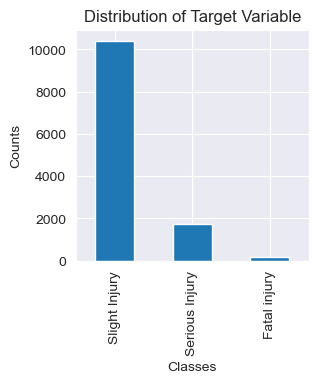

In [28]:


# you can see that our target is highly unbalanced

target_counts = df["Accident_severity"].value_counts()
# Create a bar plot
plt.figure(figsize=(3, 3))
target_counts.plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()



In [29]:
# upsampling using SMOTE or SMOTETomek 

def upsample(tech, X_train, y_train):
    counter = Counter(y_train)



    for k,v in counter.items():
        per = 100*v/len(y_train)
#         print(f"Class= {k}, n={v} ({per:.2f}%)")
        
    if tech == 'smote':
        oversample = SMOTE(random_state=42)
        X_train, y_train = oversample.fit_resample(X_train, y_train)
    elif tech =='smotet':
        smt = SMOTETomek(random_state=42)
        X_train, y_train = smt.fit_resample(X_train, y_train)
        
    counter = Counter(y_train)



    for k,v in counter.items():
        per = 100*v/len(y_train)

    return X_train, y_train 

In [30]:
def upsample_train(tech, X_train, X_test, y_train, y_test): 
    X_train, y_train = upsample(tech, X_train, y_train)  # ✅ Fix here
    print('')
    scores, models = modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, extree=True)
    print(scores)
    return scores, models


In [31]:
# ord with smote
upsample_train('smote', Xord_train, Xord_test, yord_train, yord_test)


{'xgb': 0.7828733766233766, 'rf': 0.7905844155844156, 'extree': 0.8027597402597403}


({'xgb': 0.7828733766233766,
  'rf': 0.7905844155844156,
  'extree': 0.8027597402597403},
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  RandomForestClassifier(n_estimators=200),
  ExtraTreesClassifier()])

In [32]:

upsample_train('smote', Xmean_train, Xmean_test, ymean_train, ymean_test)


{'xgb': 0.8482142857142857, 'rf': 0.8433441558441559, 'extree': 0.8425324675324676}


({'xgb': 0.8482142857142857,
  'rf': 0.8433441558441559,
  'extree': 0.8425324675324676},
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  RandomForestClassifier(n_estimators=200),
  ExtraTreesClassifier()])

In [33]:
upsample_train('smotet', Xord_train, Xord_test, yord_train, yord_test)


{'xgb': 0.7877435064935064, 'rf': 0.7897727272727273, 'extree': 0.8064123376623377}


({'xgb': 0.7877435064935064,
  'rf': 0.7897727272727273,
  'extree': 0.8064123376623377},
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  RandomForestClassifier(n_estimators=200),
  ExtraTreesClassifier()])

In [34]:
upsample_train('smotet', Xmean_train, Xmean_test, ymean_train, ymean_test)


{'xgb': 0.8522727272727273, 'rf': 0.8425324675324676, 'extree': 0.8441558441558441}


({'xgb': 0.8522727272727273,
  'rf': 0.8425324675324676,
  'extree': 0.8441558441558441},
 [XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  RandomForestClassifier(n_estimators=200),
  ExtraTreesClassifier()])

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold


def modelfit(alg, X_train, y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        
        skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=27)  
        cvresult = xgb.cv(
            xgb_param,
            xgtrain,
            num_boost_round=alg.get_params()['n_estimators'],
            folds=skf,  
            metrics='mlogloss',  
            early_stopping_rounds=early_stopping_rounds,
            seed=27
        )
        alg.set_params(n_estimators=cvresult.shape[0])

    alg.set_params(eval_metric='mlogloss')
    alg.fit(X_train, y_train)

    y_train_pred = alg.predict(X_train)

    print("\nModel Report")
    print("F1 score (micro): %.4g" % metrics.f1_score(y_train, y_train_pred, average='micro'))
    print("Accuracy: %.4g" % metrics.accuracy_score(y_train, y_train_pred))
    print("Classification Report:\n", metrics.classification_report(y_train, y_train_pred))

    return alg


In [36]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 num_class= 3,
 nthread=4,
 seed=27)
modelfit(xgb1, Xmean_train, ymean_train)
parameters = xgb1.get_params()
print('Optimal number of estimators: (n_estimators)', parameters['n_estimators'])


Model Report
F1 score (micro): 0.8645
Accuracy: 0.8645
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.29      0.45       127
           1       0.96      0.11      0.20      1394
           2       0.86      1.00      0.93      8331

    accuracy                           0.86      9852
   macro avg       0.94      0.47      0.52      9852
weighted avg       0.88      0.86      0.82      9852

Optimal number of estimators: (n_estimators) 85


In [37]:
!pip install wandb


Defaulting to user installation because normal site-packages is not writeable


In [38]:
import wandb
import os
os.environ["WANDB_SILENT"] = "true"
# wandb.login(key= ' ') #Enter your own wandb key here

In [39]:
def train():
    config_defaults = {
          'max_depth': 9,
          'n_estimators': 91,
          'colsample_bytree': 0.8,
          'subsample': 0.8,
          'gamma': 0
      }
      # Start W&B
    wandb.init(project="RTA", config=config_defaults)
    config = wandb.config
        
    X_train, X_test, y_train, y_test = Xmean_train, Xmean_test, ymean_train, ymean_test
    # upsample
    X_train, y_train = upsample('smote', X_train, y_train)
    
    model = XGBClassifier(n_estimators=config.n_estimators, max_depth=config.max_depth, min_child_weight= config.min_child_weight, colsample_bytree=config.colsample_bytree, subsample = config.subsample, gamma=config.gamma)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    score = f1_score(y_test, pred, average='micro')
    print(model.get_xgb_params())
    print(f"Score: {round(score, 4)}")

    wandb.log({"f1score": score})

In [40]:
sweep_configs = {
    "method": "bayes", # ["grid", "random", "bayes"]
    "metric": {
        "name": "f1score",
        "goal": "maximize"
    },
    "parameters": {
        "max_depth": {
            "values": [i for i in range(9,15,2)]
        }
#         "min_child_weight": {
#             "values": [i for i in range(1,6,2)]
#         }
    }
}

In [41]:
model = XGBClassifier(learning_rate=0.2,num_class= 3, n_estimators=91, max_depth=13, colsample_bytree=0.9, subsample = 0.9, gamma=0, reg_alpha= 4e-6)

X_train, y_train = upsample('smote', Xmean_train, ymean_train)
gkf = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

param = {
    
}

gsearch = GridSearchCV(
    estimator= model,
    param_grid= param,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=3
)

gsearch.fit(X=X_train, y=y_train)
gsearch.best_params_, gsearch.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


({}, 0.9430040185647016)

In [42]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    learning_rate=0.2,
    max_depth=13,
    colsample_bytree=0.9,
    subsample=0.9,
    gamma=0,
    reg_alpha=4e-6,
    n_estimators=1000  
)

X_train, y_train = upsample('smote', Xmean_train, ymean_train)
model = modelfit(model, X_train, y_train)
parameters = model.get_params()
print('Optimal number of estimators: (n_estimators)', parameters['n_estimators'])



Model Report
F1 score (micro): 0.9989
Accuracy: 0.9989
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8331
           1       1.00      1.00      1.00      8331
           2       1.00      1.00      1.00      8331

    accuracy                           1.00     24993
   macro avg       1.00      1.00      1.00     24993
weighted avg       1.00      1.00      1.00     24993

Optimal number of estimators: (n_estimators) 53


In [43]:
model = XGBClassifier(objective= 'multi:softmax', num_class= 3, n_estimators=100, learning_rate=0.2, max_depth=13, colsample_bytree=0.9, subsample = 0.9, gamma=0, reg_alpha= 4e-6)
X_train, y_train = upsample('smote', Xmean_train, ymean_train)
model.fit(X_train, y_train)
pred = model.predict(Xmean_test)
print(f1_score(ymean_test, pred, average='micro'))

0.8518668831168831


Fitting 3 folds for each of 36 candidates, totalling 108 fits


KeyboardInterrupt: 